<a href="https://www.kaggle.com/code/arinjaigupt/ds-project-1?scriptVersionId=266958197" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch 
import math 

In [2]:
data = pd.read_csv("/kaggle/input/college-student-placement-factors-dataset/college_student_placement_dataset.csv")

In [3]:
data.head()

College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0030  107             6.61  6.28                     8   
1    CLG0061   97             5.52  5.37                     8   
2    CLG0036  109             5.36  5.83                     9   
3    CLG0055  122             5.47  5.75                     6   
4    CLG0004   96             7.91  7.69                     7   

  Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                    No                       8                     8   
1                    No                       7                     8   
2                    No                       3                     1   
3                   Yes                       1                     6   
4                    No                       8                    10   

   Projects_Completed Placement  
0                   4        No  
1                   0        No  
2                   1        No  
3                   1        No  
4                   2        No

In [4]:
data.tail()

College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
9995    CLG0021  119             8.41  8.29                     4   
9996    CLG0098   70             9.25  9.34                     7   
9997    CLG0066   89             6.08  6.25                     3   
9998    CLG0045  107             8.77  8.92                     3   
9999    CLG0060  109             9.41  9.77                     8   

     Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
9995                    No                       1                     8   
9996                    No                       0                     7   
9997                   Yes                       3                     9   
9998                    No                       7                     5   
9999                    No                       3                     5   

      Projects_Completed Placement  
9995                   0       Yes  
9996                   2        No  
9997                   5        No  
9998                   1        No  
9999                   5        No

In [5]:
data.shape

(10000, 10)

In [6]:
data.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [7]:
data[data.columns[0]] = data[data.columns[0]].apply(lambda x: int(x[3:]))

In [8]:
data.head()

College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0          30  107             6.61  6.28                     8   
1          61   97             5.52  5.37                     8   
2          36  109             5.36  5.83                     9   
3          55  122             5.47  5.75                     6   
4           4   96             7.91  7.69                     7   

  Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                    No                       8                     8   
1                    No                       7                     8   
2                    No                       3                     1   
3                   Yes                       1                     6   
4                    No                       8                    10   

   Projects_Completed Placement  
0                   4        No  
1                   0        No  
2                   1        No  
3                   1        No  
4                   2        No

In [9]:
no_yes_dict = {"No":0, "Yes":1}

In [10]:
data[data.columns[5]] = data[data.columns[5]].map(no_yes_dict)

In [11]:
data.head()

College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0          30  107             6.61  6.28                     8   
1          61   97             5.52  5.37                     8   
2          36  109             5.36  5.83                     9   
3          55  122             5.47  5.75                     6   
4           4   96             7.91  7.69                     7   

   Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                      0                       8                     8   
1                      0                       7                     8   
2                      0                       3                     1   
3                      1                       1                     6   
4                      0                       8                    10   

   Projects_Completed Placement  
0                   4        No  
1                   0        No  
2                   1        No  
3                   1        No  
4                   2        No

In [12]:
data[data.columns[9]] = data[data.columns[9]].map(no_yes_dict)

In [13]:
data.head()

College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0          30  107             6.61  6.28                     8   
1          61   97             5.52  5.37                     8   
2          36  109             5.36  5.83                     9   
3          55  122             5.47  5.75                     6   
4           4   96             7.91  7.69                     7   

   Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                      0                       8                     8   
1                      0                       7                     8   
2                      0                       3                     1   
3                      1                       1                     6   
4                      0                       8                    10   

   Projects_Completed  Placement  
0                   4          0  
1                   0          0  
2                   1          0  
3                   1          0  
4                   2          0

In [14]:
corr_matrix = data.corr()

In [15]:
corr_matrix

College_ID        IQ  Prev_Sem_Result      CGPA  \
College_ID                1.000000  0.002473        -0.004060 -0.003422   
IQ                        0.002473  1.000000        -0.002640 -0.002859   
Prev_Sem_Result          -0.004060 -0.002640         1.000000  0.980768   
CGPA                     -0.003422 -0.002859         0.980768  1.000000   
Academic_Performance     -0.015442 -0.006827        -0.005765 -0.002958   
Internship_Experience     0.012037 -0.000247        -0.013347 -0.012562   
Extra_Curricular_Score   -0.003931 -0.003458         0.009326  0.011441   
Communication_Skills     -0.005194 -0.010896        -0.017269 -0.018242   
Projects_Completed        0.004903  0.014538         0.018434  0.020872   
Placement                 0.002750  0.285914         0.317896  0.321607   

                        Academic_Performance  Internship_Experience  \
College_ID                         -0.015442               0.012037   
IQ                                 -0.006827              -0.000247   
Prev_Sem_Result                    -0.005765              -0.013347   
CGPA                               -0.002958              -0.012562   
Academic_Performance                1.000000               0.025903   
Internship_Experience               0.025903               1.000000   
Extra_Curricular_Score              0.011774               0.002093   
Communication_Skills               -0.019733              -0.020437   
Projects_Completed                 -0.013148              -0.010260   
Placement                          -0.014920              -0.005841   

                        Extra_Curricular_Score  Communication_Skills  \
College_ID                           -0.003931             -0.005194   
IQ                                   -0.003458             -0.010896   
Prev_Sem_Result                       0.009326             -0.017269   
CGPA                                  0.011441             -0.018242   
Academic_Performance                  0.011774             -0.019733   
Internship_Experience                 0.002093             -0.020437   
Extra_Curricular_Score                1.000000              0.003769   
Communication_Skills                  0.003769              1.000000   
Projects_Completed                    0.008122             -0.004486   
Placement                            -0.004740              0.323155   

                        Projects_Completed  Placement  
College_ID                        0.004903   0.002750  
IQ                                0.014538   0.285914  
Prev_Sem_Result                   0.018434   0.317896  
CGPA                              0.020872   0.321607  
Academic_Performance             -0.013148  -0.014920  
Internship_Experience            -0.010260  -0.005841  
Extra_Curricular_Score            0.008122  -0.004740  
Communication_Skills             -0.004486   0.323155  
Projects_Completed                1.000000   0.217499  
Placement                         0.217499   1.000000

In [16]:
feature_selected_data = data[[data.columns[1],data.columns[2],data.columns[3],data.columns[7],data.columns[8],data.columns[9]]]

In [17]:
feature_selected_data

IQ  Prev_Sem_Result  CGPA  Communication_Skills  Projects_Completed  \
0     107             6.61  6.28                     8                   4   
1      97             5.52  5.37                     8                   0   
2     109             5.36  5.83                     1                   1   
3     122             5.47  5.75                     6                   1   
4      96             7.91  7.69                    10                   2   
...   ...              ...   ...                   ...                 ...   
9995  119             8.41  8.29                     8                   0   
9996   70             9.25  9.34                     7                   2   
9997   89             6.08  6.25                     9                   5   
9998  107             8.77  8.92                     5                   1   
9999  109             9.41  9.77                     5                   5   

      Placement  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
9995          1  
9996          0  
9997          0  
9998          0  
9999          0  

[10000 rows x 6 columns]

In [18]:
placement_equals_1 = data[data[data.columns[-1]] == 1].shape[0] / data.shape[0]

In [19]:
placement_equals_1

0.1659

<Axes: >

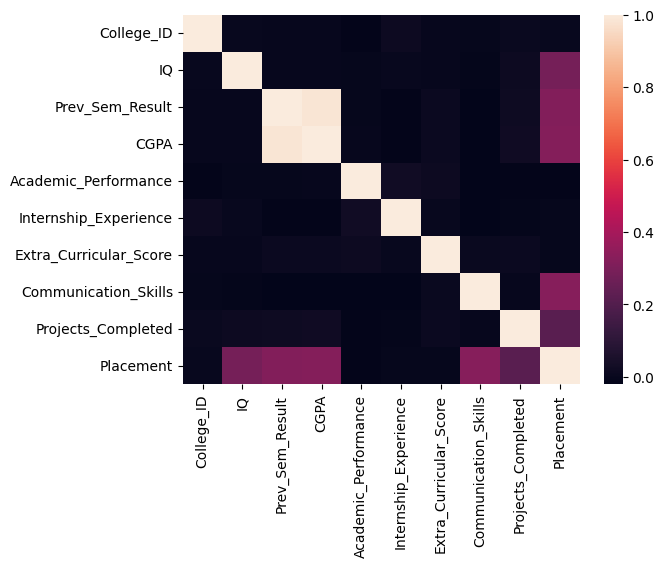

In [20]:
sns.heatmap(corr_matrix)

<Axes: >

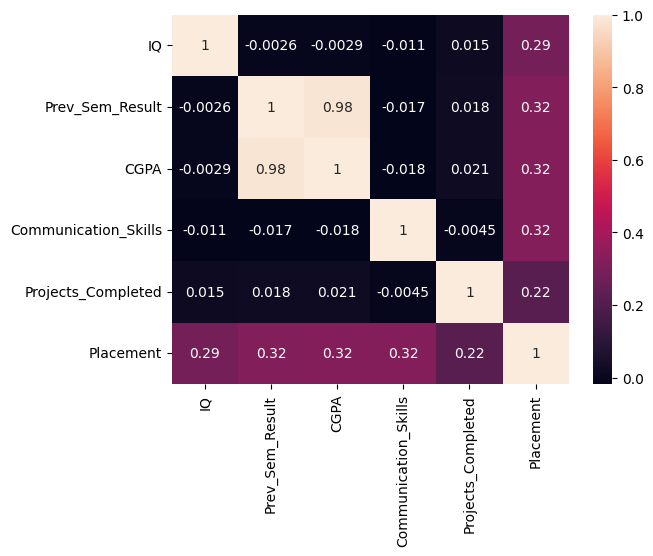

In [21]:
sns.heatmap(feature_selected_data.corr(), annot=True)

In [22]:
X = np.array(feature_selected_data.iloc[:,0:-1])
cov_mat = np.cov(X, rowvar = False)
F = np.linalg.svd(cov_mat)

In [23]:
F

SVDResult(U=array([[-9.99996139e-01, -2.17743344e-03, -3.46642553e-04,
        -1.69114141e-03,  1.81562132e-05],
       [ 2.57815004e-04,  1.75779405e-02, -7.00202535e-01,
        -3.92089239e-02, -7.12649998e-01],
       [ 2.83169595e-04,  1.83550525e-02, -7.11415827e-01,
        -3.77209711e-02,  7.01518112e-01],
       [ 2.18074163e-03, -9.99665581e-01, -2.56049574e-02,
         2.87028185e-03,  3.43247779e-04],
       [-1.67910057e-03,  4.25354616e-03, -5.42973035e-02,
         9.98513240e-01, -1.48345515e-03]]), S=array([2.26597565e+02, 8.41678439e+00, 4.21673530e+00, 2.94002762e+00,
       4.09142123e-02]), Vh=array([[-9.99996139e-01,  2.57815004e-04,  2.83169595e-04,
         2.18074163e-03, -1.67910057e-03],
       [-2.17743344e-03,  1.75779405e-02,  1.83550525e-02,
        -9.99665581e-01,  4.25354616e-03],
       [-3.46642553e-04, -7.00202535e-01, -7.11415827e-01,
        -2.56049574e-02, -5.42973035e-02],
       [-1.69114141e-03, -3.92089239e-02, -3.77209711e-02,
         2

In [24]:
E = F[0]
lamda = F[1]


In [25]:
E.shape



(5, 5)

In [26]:
E[:,0]

array([-9.99996139e-01,  2.57815004e-04,  2.83169595e-04,  2.18074163e-03,
       -1.67910057e-03])

In [27]:
E[:,0:-1]

array([[-9.99996139e-01, -2.17743344e-03, -3.46642553e-04,
        -1.69114141e-03],
       [ 2.57815004e-04,  1.75779405e-02, -7.00202535e-01,
        -3.92089239e-02],
       [ 2.83169595e-04,  1.83550525e-02, -7.11415827e-01,
        -3.77209711e-02],
       [ 2.18074163e-03, -9.99665581e-01, -2.56049574e-02,
         2.87028185e-03],
       [-1.67910057e-03,  4.25354616e-03, -5.42973035e-02,
         9.98513240e-01]])

In [28]:
np.dot(E[:,0],E[:,1]) #orthogonal vector 

4.2595875507287843e-19

In [29]:
np.dot(E[:,0],E[:,0])  

1.0000000000000004

In [30]:
#eigen values 
lamda

array([2.26597565e+02, 8.41678439e+00, 4.21673530e+00, 2.94002762e+00,
       4.09142123e-02])

In [31]:
# change our data 
new_X = np.matmul(X,F[0])

In [32]:
new_cov_mat = np.cov(new_X, rowvar= False)

In [33]:
print(new_cov_mat)

[[ 2.26597565e+02 -6.45436300e-14  3.26882347e-16 -1.79572107e-15
   3.26882347e-17]
 [-6.45436300e-14  8.41678439e+00 -1.94175220e-15 -4.49907360e-16
  -5.77262677e-16]
 [ 3.26882347e-16 -1.94175220e-15  4.21673530e+00 -1.32253000e-15
   8.46857338e-16]
 [-1.79572107e-15 -4.49907360e-16 -1.32253000e-15  2.94002762e+00
  -7.57392171e-16]
 [ 3.26882347e-17 -5.77262677e-16  8.46857338e-16 -7.57392171e-16
   4.09142123e-02]]


In [34]:
new_cov_mat.shape

(5, 5)

<Axes: >

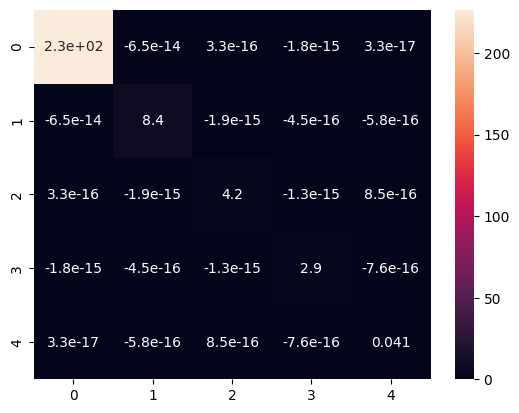

In [35]:
sns.heatmap(new_cov_mat, annot=True )

In [36]:
new_features = pd.DataFrame(data = new_X ,
                            columns = ["Input_feat_1","Input_feat_2","Input_feat_3","Input_feat_4","Input_feat_5"])

In [37]:
new_features 

Input_feat_1  Input_feat_2  Input_feat_3  Input_feat_4  Input_feat_5
0      -106.985375     -7.981836     -9.555150      3.340004     -0.306328
1       -96.979236     -8.012939     -7.923885     -0.560073     -0.162169
2      -108.996045     -1.031525     -8.018326      0.386976      0.270885
3      -121.985085     -6.057694     -8.170966      0.378047      0.138325
4       -95.976963     -9.916990    -11.407312      1.263163     -0.240179
...            ...           ...           ...           ...           ...
9995   -118.977579     -7.956445    -12.032431     -0.820737     -0.172895
9996    -69.982793     -6.807540    -13.433592      1.183742     -0.039127
9997    -88.985088     -8.947921     -9.236363      4.393741      0.048864
9998   -106.985575     -4.909174    -12.706018      0.151579      0.009777
9999   -108.991878     -4.869663    -13.976734      4.085093      0.144073

[10000 rows x 5 columns]

<Axes: >

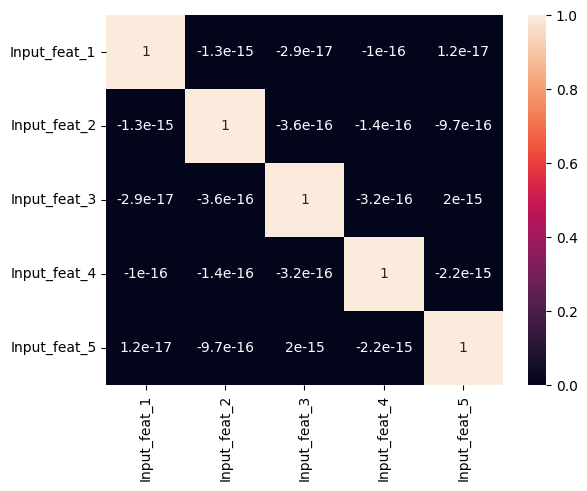

In [38]:
sns.heatmap(new_features.corr(), annot = True)

In [39]:
new_data = pd.concat([new_features,feature_selected_data[data.columns[-1]]],axis=1)

In [40]:
new_data

Input_feat_1  Input_feat_2  Input_feat_3  Input_feat_4  Input_feat_5  \
0      -106.985375     -7.981836     -9.555150      3.340004     -0.306328   
1       -96.979236     -8.012939     -7.923885     -0.560073     -0.162169   
2      -108.996045     -1.031525     -8.018326      0.386976      0.270885   
3      -121.985085     -6.057694     -8.170966      0.378047      0.138325   
4       -95.976963     -9.916990    -11.407312      1.263163     -0.240179   
...            ...           ...           ...           ...           ...   
9995   -118.977579     -7.956445    -12.032431     -0.820737     -0.172895   
9996    -69.982793     -6.807540    -13.433592      1.183742     -0.039127   
9997    -88.985088     -8.947921     -9.236363      4.393741      0.048864   
9998   -106.985575     -4.909174    -12.706018      0.151579      0.009777   
9999   -108.991878     -4.869663    -13.976734      4.085093      0.144073   

      Placement  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
9995          1  
9996          0  
9997          0  
9998          0  
9999          0  

[10000 rows x 6 columns]

<Axes: >

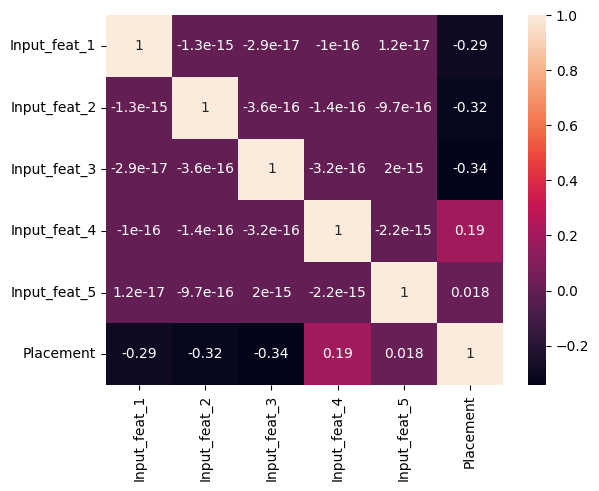

In [41]:
sns.heatmap(new_data.corr(),annot=True)

(array([  3.,  22., 101., 362., 572., 236., 208., 109.,  38.,   8.]),
 array([-157.98374855, -147.7834374 , -137.58312626, -127.38281511,
        -117.18250397, -106.98219282,  -96.78188168,  -86.58157053,
         -76.38125939,  -66.18094824,  -55.98063709]),
 <BarContainer object of 10 artists>)

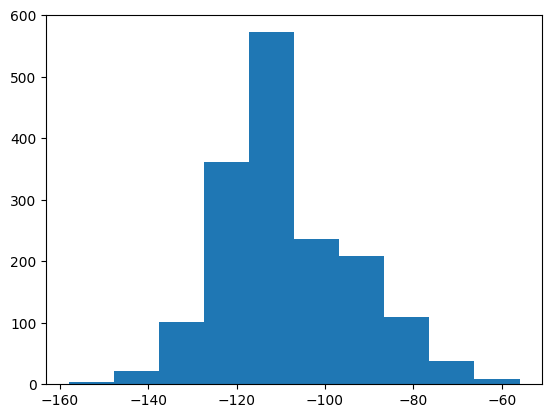

In [42]:
plt.hist(new_data[new_data[new_data.columns[-1]] == 1][new_data.columns[0]])

In [43]:
# blueprint of neural network of likelihood function
class GuassianMLEstimatorNN(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.mu = torch.nn.Parameter(data = torch.tensor([-90.0]))
        self.log_sigma = torch.nn.Parameter(data = torch.tensor([1.0]))

#forward pass
    def forward(self,x):

        g = -self.mu
        h = (x+g)
        I = h**2
        sigma = torch.exp(self.log_sigma)
        j = (-1/(2*sigma**2))*I
        k = torch.exp(j)
        l = (1/(math.sqrt(2*math.pi)*sigma))*k
        f = torch.log(l)
        return -torch.mean(f)